In [1]:
#Utilize como base todos os passos vistos na Aula10:
import pandas as pd

In [2]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')

# Data Cleaning

## Dados Nulos

In [5]:
#Esse caso está substituindo os valores nulos por informações que são possíveis de rastrear depois:
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '01/01/2020'

In [6]:
#Buscando dois casos de informação nula visto na Aula10:
dfClientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,01/01/2020
287,288,Victor Ribeiro,O,12/17/1974


In [7]:
#Mostrando que não há mais dados nulos
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

## Outliers

In [9]:
#Buscando por informações muito fora do padrão, nesse caso por dados numéricos, tem algumas que só possuem o id, por isso
#utilizaremos apenas a tabela Produtos, não esquecendo que foi utilizado uma ferramenta 'boxplot' para o tal anteriormente:
dfClientes
dfLojas
dfVendas
dfPagamentos
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [10]:
#Manipulando o valor do produto 'xxx-231a' para chegar em um valor real:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


<Axes: >

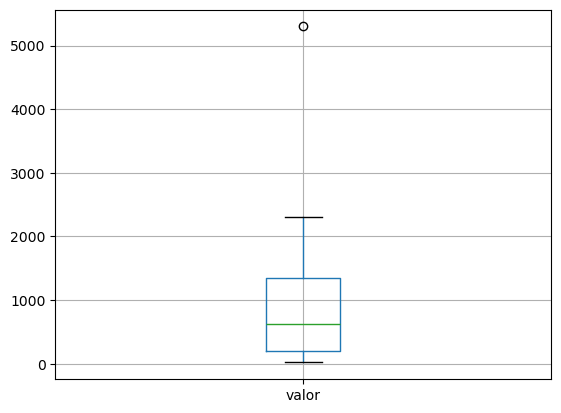

In [11]:
#Ainda irá existir um outlier, mas é um outlier esperado:
dfProdutos.boxplot(column = ['valor'])

## Consistência

In [13]:
#Buscando ids de clientes que não estão sendo citados dentro da tabela Vendas:
~dfVendas.id_cliente.isin(dfClientes.id).any()
#O '~' se refere a uma negação, 'isin' verifica se estão dentro e o any() diz se 'True' ou 'False'...

False

In [14]:
#Para visualização:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [15]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [16]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [17]:
#Vendo se existe algum pagamento com um id que não foi registrado ainda na tabela vendas:
dfPagamentos[~dfPagamentos.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [18]:
#O inverso, quantidade de vendas que não geraram pagamentos:
dfVendas[~dfVendas.id.isin(dfPagamentos.id)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Dados Duplicados

In [20]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [21]:
dfClientes[dfClientes.nome == 'Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [22]:
dfClientes.drop('id', axis = 1).duplicated().sum()

0

In [23]:
dfProdutos.produto.duplicated().sum()

0

In [24]:
dfLojas.cidade.duplicated().sum()

0

In [25]:
#Descobrindo que repete uma venda:
dfVendas.drop('id', axis = 1).duplicated().sum()

1

In [26]:
#Analisando ela:
dfVendas[dfVendas.drop('id', axis = 1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [27]:
#Mostrando que existe uma repetição, porém ocorre só uma vez, então não tem como saber se foi o cliente que comprou o mesmo
#produto duas vezes o mesmo produto ou se foi erro do sistema:
dfVendas[(dfVendas.id_cliente == 559) & (dfVendas.id_loja == 2) & (dfVendas.id_produto == 5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [28]:
dfPagamentos.drop('id', axis = 1).duplicated().sum()

0

## Formato de Dados

In [30]:
#Convertendo a data para o formato certo utilizado(padrão):
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format = '%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## Indexes

In [32]:
#Transformando os ids no próprio index, o que foi criado para o banco de dados automaticamente:
dfClientes = dfClientes.set_index('id')
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')
#sendo necessário buscar com 'index' e não assim: 'dfClientes['id']'
#Maneira certa:
dfClientes.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='id', length=1000)